In [40]:
import lab3_part1 # showcasing importing, but not really necessary (we do get more information about the questions though)
import pandas as pd
import json
import os
import copy # to get deep copy
import seaborn as sns
sns.set_theme('paper','white')

In [41]:
# load the data as a dictionary
data_files = os.listdir("data")
data = dict()
for filename in data_files:
    with open("data/"+filename) as f:
        json_data = f.read()
        id = filename.split(".")[0]
        form_data = json.loads(json_data)
        data[id] = form_data

df = pd.DataFrame.from_dict(data,orient='index')
for q in lab3_part1.MyForm().questions:
    print(q.title,": ",q.prompt)
display(df.head())

Name :  Enter your name (family name, given name): 
Age :  Enter your age as a single, whole number (e.g., 42).  If you prefer to leave this blank, enter -1: 
Current Degree :  Enter your current degree type (undergraduate,masters,doctorate): 
Prior Institutions :  Enter any past institutions you have attended (separate multiple entries with a comma, e.g., University of Georgia, Penn State University): 
Programming Experience :  Enter your level of programming experience on a scale from 0 (none, like Steve Jobs) to 10 (expert, like John Carmack): 
Comment :  Provide a short description of where you obtained that experience: 


,Name,Age,Current Degree,Prior Institutions,Programming Experience,Comment
30c26ceb-feeb-4b9f-8358-23236913a988,"{'answer': ['smith', 'john'], 'time': 17087982...","{'answer': -1, 'time': 1708798280.1392314}","{'answer': 'doctorate', 'time': 1708798283.158...","{'answer': ['usc', 'umich', 'other'], 'time': ...","{'answer': 10, 'time': 1708798306.092605}","{'answer': 'college. I know c++ and python', ..."
3719214d-8d9a-497a-b3b4-27f017d369bd,"{'answer': ['Manning', 'Peyton'], 'time': 1708...","{'answer': 45, 'time': 1708798430.7133014}","{'answer': 'undergraduate', 'time': 1708798432...","{'answer': ['tennessee', 'georgia'], 'time': 1...","{'answer': 0, 'time': 1708798445.3631327}","{'answer': '', 'time': 1708798450.1959696}"
3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,"{'answer': ['Johnsen', 'Kyle'], 'time': 170872...","{'answer': 42, 'time': 1708729037.2595313}","{'answer': 'masters', 'time': 1708729038.3313591}","{'answer': ['uga', 'ufl'], 'time': 1708729041....","{'answer': 10, 'time': 1708729047.0994296}","{'answer': 'teaching', 'time': 1708729051.7732..."
475c35cb-2f2b-4df1-8d18-99097b832960,"{'answer': ['beyette', 'fred'], 'time': 170879...","{'answer': 60, 'time': 1708798464.5689075}","{'answer': 'doctorate', 'time': 1708798466.626...","{'answer': ['uga', 'cincinnatti'], 'time': 170...","{'answer': 8, 'time': 1708798482.7134845}",{'answer': 'teaching topics like python and c+...
4e93f067-7c48-4a4c-a5a6-992e0ed190a0,"{'answer': ['', 'Prince'], 'time': 1708798653....","{'answer': -1, 'time': 1708798658.3871481}","{'answer': 'undergraduate', 'time': 1708798666...",{'answer': ['minneapolis central high school']...,"{'answer': 0, 'time': 1708798700.394066}","{'answer': '', 'time': 1708798706.2742574}"


In [42]:
# the data is close, but I don't like having all of this extra info in each.  
# the first thing that needs to be fixed is to get the name as 2 separate columns firstname, lastname
def extract_first_last(name_dict:dict):
    first_name_dict = copy.deepcopy(name_dict)
    last_name_dict = copy.deepcopy(name_dict)
    first_name_dict['answer'] = first_name_dict['answer'][1]
    last_name_dict['answer'] = last_name_dict['answer'][0]
    return last_name_dict,first_name_dict
def extract_num_institutions(institutions_dict:dict):
    institutions_dict = copy.deepcopy(institutions_dict)
    institutions_dict['answer'] = len(institutions_dict['answer'])
    return institutions_dict
df2 = df.copy()
df2[['Last Name','First Name']] = list(df2['Name'].apply(extract_first_last))
df2.drop(columns=['Name'],inplace=True)
# I'm also going to convert the institutions field into a number
df2['Prior Institutions'] = df2['Prior Institutions'].apply(extract_num_institutions)
df2


,Age,Current Degree,Prior Institutions,Programming Experience,Comment,Last Name,First Name
30c26ceb-feeb-4b9f-8358-23236913a988,"{'answer': -1, 'time': 1708798280.1392314}","{'answer': 'doctorate', 'time': 1708798283.158...","{'answer': 3, 'time': 1708798298.1887238}","{'answer': 10, 'time': 1708798306.092605}","{'answer': 'college. I know c++ and python', ...","{'answer': 'smith', 'time': 1708798258.8788083}","{'answer': 'john', 'time': 1708798258.8788083}"
3719214d-8d9a-497a-b3b4-27f017d369bd,"{'answer': 45, 'time': 1708798430.7133014}","{'answer': 'undergraduate', 'time': 1708798432...","{'answer': 2, 'time': 1708798437.2031016}","{'answer': 0, 'time': 1708798445.3631327}","{'answer': '', 'time': 1708798450.1959696}","{'answer': 'Manning', 'time': 1708798420.0871553}","{'answer': 'Peyton', 'time': 1708798420.0871553}"
3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,"{'answer': 42, 'time': 1708729037.2595313}","{'answer': 'masters', 'time': 1708729038.3313591}","{'answer': 2, 'time': 1708729041.4760137}","{'answer': 10, 'time': 1708729047.0994296}","{'answer': 'teaching', 'time': 1708729051.7732...","{'answer': 'Johnsen', 'time': 1708729034.5633492}","{'answer': 'Kyle', 'time': 1708729034.5633492}"
475c35cb-2f2b-4df1-8d18-99097b832960,"{'answer': 60, 'time': 1708798464.5689075}","{'answer': 'doctorate', 'time': 1708798466.626...","{'answer': 2, 'time': 1708798469.5616114}","{'answer': 8, 'time': 1708798482.7134845}",{'answer': 'teaching topics like python and c+...,"{'answer': 'beyette', 'time': 1708798455.3269858}","{'answer': 'fred', 'time': 1708798455.3269858}"
4e93f067-7c48-4a4c-a5a6-992e0ed190a0,"{'answer': -1, 'time': 1708798658.3871481}","{'answer': 'undergraduate', 'time': 1708798666...","{'answer': 1, 'time': 1708798672.3296373}","{'answer': 0, 'time': 1708798700.394066}","{'answer': '', 'time': 1708798706.2742574}","{'answer': '', 'time': 1708798653.3050485}","{'answer': 'Prince', 'time': 1708798653.3050485}"
5d90b80e-b1ee-4dcf-b059-022c38469707,"{'answer': 18, 'time': 1708798211.7544885}","{'answer': 'undergraduate', 'time': 1708798213...","{'answer': 4, 'time': 1708798217.2994654}","{'answer': 8, 'time': 1708798236.404086}",{'answer': 'Mostly self learned. I know python...,"{'answer': 'Doe', 'time': 1708798203.4660444}","{'answer': 'Jane', 'time': 1708798203.4660444}"
61f84c44-c68b-4e3d-956a-82ac544f1c8c,"{'answer': -1, 'time': 1708798566.7889645}","{'answer': 'undergraduate', 'time': 1708798572...","{'answer': 2, 'time': 1708798577.2977211}","{'answer': 9, 'time': 1708798582.186082}","{'answer': 'unity c#, teaching doing research'...","{'answer': 'Bowers', 'time': 1708798555.699143}","{'answer': 'Brook', 'time': 1708798555.699143}"
8a476a1e-1aa9-4418-8d2f-b500cafafc4a,"{'answer': 28, 'time': 1708798515.9128602}","{'answer': 'masters', 'time': 1708798518.0032315}","{'answer': 1, 'time': 1708798521.712849}","{'answer': 10, 'time': 1708798525.00567}",{'answer': 'most programming unity (C#) in the...,"{'answer': 'Franzluebbers', 'time': 1708798502...","{'answer': 'Anton', 'time': 1708798502.2473073}"
a5c7dbd2-7f00-41b4-a923-d7353981f87d,"{'answer': 30, 'time': 1708798627.2027209}","{'answer': 'doctorate', 'time': 1708798629.715...","{'answer': 2, 'time': 1708798631.8327777}","{'answer': 10, 'time': 1708798636.1852462}","{'answer': 'doing my research python c++', 'ti...","{'answer': 'Rodriguez Sanchez', 'time': 170879...","{'answer': 'Javier', 'time': 1708798610.649313}"
e7d017fc-d5b6-4d84-9a96-cd2a3b763eab,"{'answer': 12, 'time': 1708788190.8751853}","{'answer': 'undergraduate', 'time': 1708788194...","{'answer': 1, 'time': 1708788197.8027859}","{'answer': 0, 'time': 1708788200.363618}","{'answer': '', 'time': 1708788211.4748573}","{'answer': 'Johnsen', 'time': 1708788185.240854}","{'answer': 'Claire', 'time': 1708788185.240854}"


In [43]:
# another way to view the data is as answers to each question, so each row is a question, with a type, an answer, an entry time, an id, etc. 
df3 = df2.melt(ignore_index=False).reset_index()
df3['answer'] = df3.value.apply(lambda x: x['answer'])
df3['entry_time'] = df3.value.apply(lambda x: pd.to_datetime(x['time'],unit='s',utc=True))
df3 = df3[['index','variable','answer','entry_time']]
df3.columns = ['id','question','answer','entry_time']
df3 = df3.sort_values('entry_time')
df3

,id,question,answer,entry_time
62,3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,First Name,Kyle,2024-02-23 22:57:14.563349247+00:00
52,3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,Last Name,Johnsen,2024-02-23 22:57:14.563349247+00:00
2,3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,Age,42,2024-02-23 22:57:17.259531260+00:00
12,3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,Current Degree,masters,2024-02-23 22:57:18.331359148+00:00
22,3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,Prior Institutions,2,2024-02-23 22:57:21.476013660+00:00
...,...,...,...,...
4,4e93f067-7c48-4a4c-a5a6-992e0ed190a0,Age,-1,2024-02-24 18:17:38.387148142+00:00
14,4e93f067-7c48-4a4c-a5a6-992e0ed190a0,Current Degree,undergraduate,2024-02-24 18:17:46.648854256+00:00
24,4e93f067-7c48-4a4c-a5a6-992e0ed190a0,Prior Institutions,1,2024-02-24 18:17:52.329637289+00:00
34,4e93f067-7c48-4a4c-a5a6-992e0ed190a0,Programming Experience,0,2024-02-24 18:18:20.394066095+00:00


In [44]:
import numpy as np # used for the "peak to peak" function
# Now that we have the data organized, we can display the data in wide form easily by a pivot
sort_order = ['First Name','Last Name','Age','Current Degree','Prior Institutions','Programming Experience','Comment']
df_form = df3.pivot(index='id',columns='question',values='answer')[sort_order]
df_form.info()
df_form['Age'] = df_form['Age'].astype('int')
df_form['Prior Institutions'] = df_form['Prior Institutions'].astype('int')
df_form['Programming Experience'] = df_form['Programming Experience'].astype('int')
df_form['Form Duration'] = df3.groupby('id')['entry_time'].agg(np.ptp).dt.total_seconds() # this is a bit crazy, found on the internets
df_form.info()
display(df_form)


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 30c26ceb-feeb-4b9f-8358-23236913a988 to e7d017fc-d5b6-4d84-9a96-cd2a3b763eab
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First Name              10 non-null     object
 1   Last Name               10 non-null     object
 2   Age                     10 non-null     object
 3   Current Degree          10 non-null     object
 4   Prior Institutions      10 non-null     object
 5   Programming Experience  10 non-null     object
 6   Comment                 10 non-null     object
dtypes: object(7)
memory usage: 640.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 30c26ceb-feeb-4b9f-8358-23236913a988 to e7d017fc-d5b6-4d84-9a96-cd2a3b763eab
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First Name              10 non-null     obje

question,First Name,Last Name,Age,Current Degree,Prior Institutions,Programming Experience,Comment,Form Duration
id,,,,,,,,
30c26ceb-feeb-4b9f-8358-23236913a988,john,smith,-1,doctorate,3,10,college. I know c++ and python,50.946867
3719214d-8d9a-497a-b3b4-27f017d369bd,Peyton,Manning,45,undergraduate,2,0,,30.108814
3ed12c6c-80d7-4fd6-b4a1-aa93daf01a55,Kyle,Johnsen,42,masters,2,10,teaching,17.209923
475c35cb-2f2b-4df1-8d18-99097b832960,fred,beyette,60,doctorate,2,8,teaching topics like python and c++,30.419011
4e93f067-7c48-4a4c-a5a6-992e0ed190a0,Prince,,-1,undergraduate,1,0,,52.969209
5d90b80e-b1ee-4dcf-b059-022c38469707,Jane,Doe,18,undergraduate,4,8,Mostly self learned. I know python and r,36.666262
61f84c44-c68b-4e3d-956a-82ac544f1c8c,Brook,Bowers,-1,undergraduate,2,9,"unity c#, teaching doing research",32.567505
8a476a1e-1aa9-4418-8d2f-b500cafafc4a,Anton,Franzluebbers,28,masters,1,10,most programming unity (C#) in the virtual exp...,25.075172
a5c7dbd2-7f00-41b4-a923-d7353981f87d,Javier,Rodriguez Sanchez,30,doctorate,2,10,doing my research python c++,30.392863


In [45]:
# display each in some way
# For names, we'll combine first and last names into one name and sort the names, printing as a python list
full_names = df_form[['First Name','Last Name']].apply(lambda x: x['First Name'] + " " + x['Last Name'],axis=1).sort_values()
for n in full_names: print(n)

Anton Franzluebbers
Brook Bowers
Claire Johnsen
Jane Doe
Javier Rodriguez Sanchez
Kyle Johnsen
Peyton Manning
Prince 
fred beyette
john smith


3  didn't answer


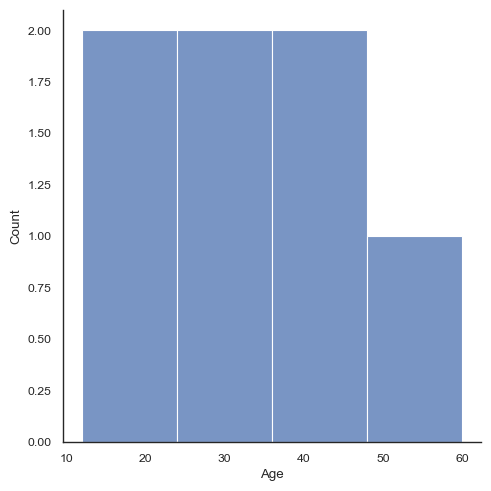

In [46]:
# For ages, we'll do a histogram using seaborn of all of the ages we have
sns.displot(df_form.query('Age != -1'),x="Age")
print(len(df_form.query('Age==-1'))," didn't answer")

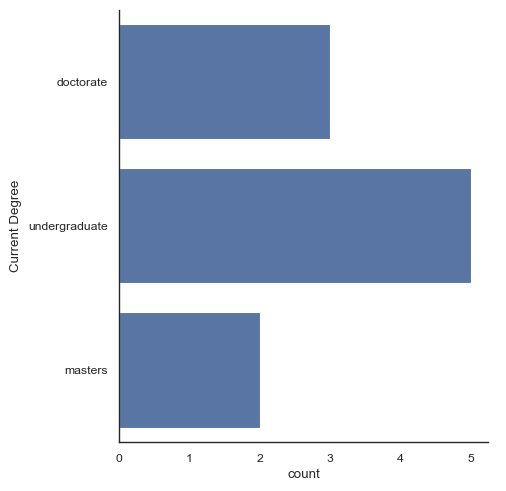

In [47]:
# for current degree, we'll do a horizontal count
sns.catplot(df_form,y="Current Degree",kind="count")

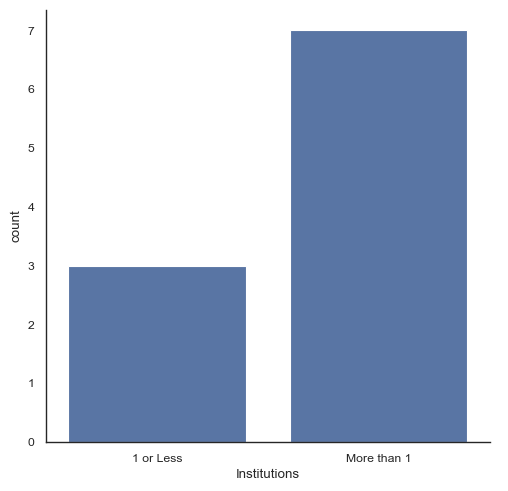

In [48]:
# For prior institutions, we'll do a countplot as well (this time vertical)
# But before we do that, we'll bin these  0, 1, more than 1

df_form['Institutions'] = df_form['Prior Institutions'].apply(lambda x: 'More than 1' if x > 1 else "1 or Less")
sns.catplot(df_form,x = 'Institutions', kind='count',order=['1 or Less','More than 1'])

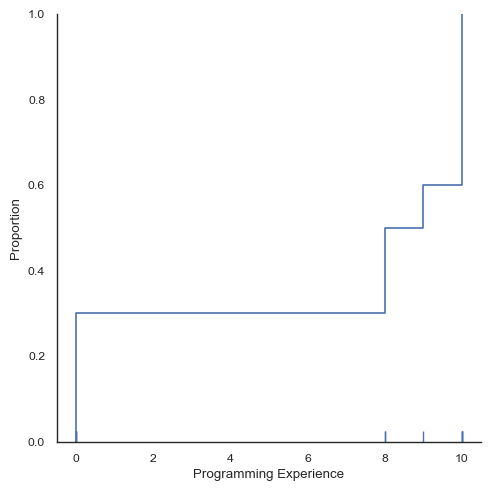

In [53]:
# For programming experience, let's do a proportion below each value with a rug of actual values
sns.displot(df_form,x='Programming Experience',kind='ecdf',rug=True)

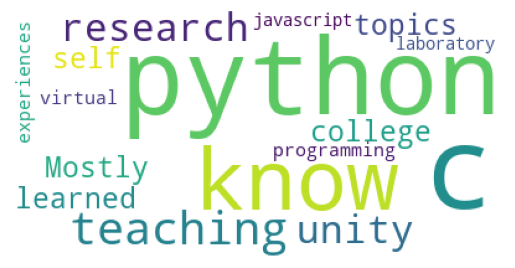

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Lastly, though this is just for fun, let's do a word cloud for the comments
words = []
for w in df_form['Comment'].apply(lambda x: x.split()): words.extend(w)
wc = WordCloud(collocations = False, background_color = 'white').generate(" ".join(words))
plt.imshow(wc)
plt.axis('off')
plt.show()


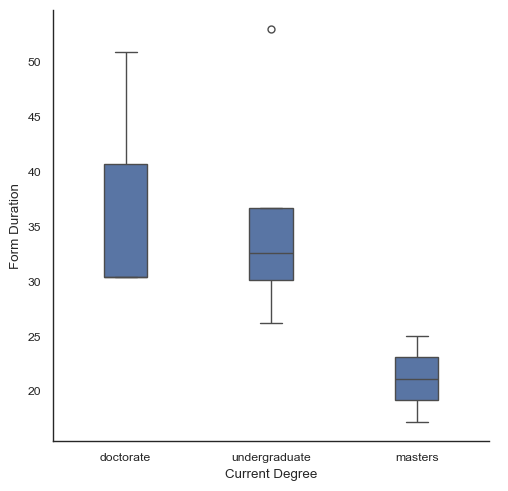

In [51]:
# lastly, let's include the form duration as a simple box plot according to degree type
sns.catplot(df_form,x='Current Degree',y='Form Duration',kind='box',width=.3)